# [Cichocki et al. 1994] - Robust Learning ALgorithm for Blind Separation of Signals
Reproducing results <br>
04/03/2021

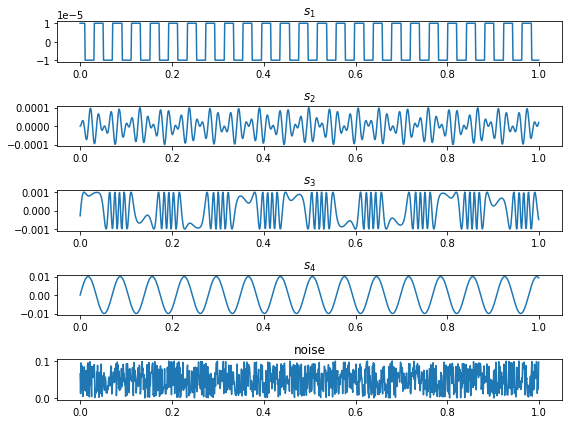

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)

dt = 1e-3
#signals
t = np.arange(0, 1, dt)
s1 = (1e-5)*np.sign(np.cos(155*t))
s2 = (1e-4)*np.sin(350*t)*np.sin(60*t)
s3 = (1e-3)*np.sin(300*t + 6*np.cos(57*t))
s4 = (1e-2)*np.sin(90*t)

#noise

noise = np.random.rand(len(t))*0.1
# noise = 1e-5*np.cos(25*t)

plt.figure(figsize=(8,6))
plt.subplot(511)
plt.plot(t, s1)
plt.title('$s_1$')
plt.subplot(512)
plt.plot(t, s2)
plt.title('$s_2$')
plt.subplot(513)
plt.plot(t, s3)
plt.title('$s_3$')
plt.subplot(514)
plt.plot(t, s4)
plt.title('$s_4$')
plt.subplot(515)
plt.plot(t, noise)
plt.title('noise')
plt.tight_layout()

[[100.          50.          33.33333333  25.          20.        ]
 [ 50.          33.33333333  25.          20.          16.66666667]
 [ 33.33333333  25.          20.          16.66666667  14.28571429]
 [ 25.          20.          16.66666667  14.28571429  12.5       ]
 [ 20.          16.66666667  14.28571429  12.5         11.11111111]]


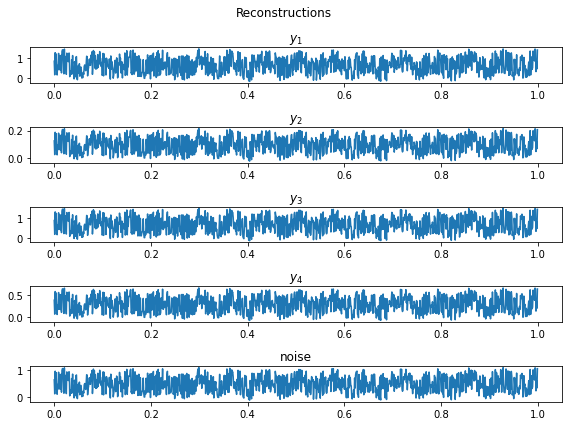

In [4]:
from scipy.linalg import hilbert
np.random.seed(1000)
n = 5
to = 0.25
i = 0
# A = np.random.rand(len(s),len(s))#mixing matrix
# A = np.random.randint(50, size=(len(s),len(s)))#mixing matrix
A = hilbert(5)*100
print(A)

# A = np.eye(5)
w_d = np.random.rand(5) #initial condition for unmixing matrix
W = np.diag(w_d)
# W = np.eye(len(s)) #unmixing matrix non-singular
x = np.zeros((n, len(t)))
y = np.zeros((n, len(t)))
dt_S = 1e-12

def mu_i(ti, ta):
    if ti <= ta:
        mu = 200
    if ti > ta:
        mu = 200*np.exp(-6*(ti-ta))
    return mu

for i in range(len(t)):
    mu = np.eye(5)*mu_i(t[i], to) #learning rate
    Lambda = Gamma =np.eye(5)
    s = np.array([s1[i], s2[i], s3[i], s4[i], noise[i]])
    x[:, i] = np.matmul(A, s) #mixing
    y[:, i] = np.matmul(W, x[:, i]) #unmixing
    fy = (y[:, i]**2)*np.sign(y[:, i])
    gy = 3*np.tanh(10*y[:, i])
    dW = dt_S*mu*(Lambda - Gamma*(np.matmul(fy, gy)))*W
    W = W + dW #Forward Euler Integration
#     print(W, '\n')

plt.figure(figsize=(8,6))
plt.subplot(511)
plt.plot(t, y[0,:])
plt.title('$y_1$')
plt.subplot(512)
plt.plot(t, y[1,:])
plt.title('$y_2$')
plt.subplot(513)
plt.plot(t, y[2,:])
plt.title('$y_3$')
plt.subplot(514)
plt.plot(t, y[3,:])
plt.title('$y_4$')
plt.subplot(515)
plt.plot(t, y[4,:])
plt.title('noise')
plt.suptitle('Reconstructions')
plt.tight_layout()

In [ ]:
x.shape

In [ ]:
len(t)